<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Práctica 3. Análisis estadístico de señales EEG y EMG </center></font></h1>
<font  face="Courier New" size="3">
<p1><center> Angie Triana - Erika Gómez - Ana Carolina Mejía</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

In [3]:
!pip install pingouin

   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   ---- ---------------------------------- 20.5/198.9 kB 217.9 kB/s eta 0:00:01
   ------------ -------------------------- 61.4/198.9 kB 544.7 kB/s eta 0:00:01
   ---------------------------------------- 198.9/198.9 kB 1.3 MB/s eta 0:00:00


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from scipy import stats
import pingouin as pg

## Procedimiento

### 1. Implementación de funciones

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:

In [86]:
def valor_rms(señal): #Recibe un arreglo de numpy.
    valor_rms = np.sqrt(np.mean(señal**2)) #Da información sobre la energía de la señal
    return valor_rms

In [42]:
#Prueba
señal=np.array([1,2,3,4,5])

In [44]:
#Prueba
valor_rms=valor_rms(señal)

In [46]:
valor_rms

3.3166247903554

In [50]:
signal_data=sio.loadmat('signals.mat')

In [52]:
signal_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015',
 '__version__': '1.0',
 '__globals__': [],
 'Fs': array([[1024]], dtype=uint16),
 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
         4365.31103516, 4370.91796875]]),
 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
         -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]),
 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
         220.4135886 , 151.5810508 ]]),
 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
         -539.9349533 , -772.65519631]]),
 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
         1416.109375  , 1352.75012207]]),
 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
         -3791.24267578, -3924.6550293 , -4109.94433594]])}

In [54]:
print(signal_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


In [102]:
ECG_asRecording=signal_data['ECG_asRecording']

In [104]:
ECG_asRecording.shape

(1, 30720)

In [164]:
duration = ECG_asRecording.shape[1]/1024 #Cada señal dura 30 segundos?

In [166]:
vector_time = tiempo = np.arange(0, duration, 1/1024)

In [258]:
periodo=1/1024

In [260]:
vector_time[0:1024]

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.97070312e-01, 9.98046875e-01, 9.99023438e-01])

In [262]:
vector_time[0:1024].size

1024

In [170]:
vector_time.size

30720

In [154]:
ECG_asRecording[0:29]

array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]])

In [196]:
time_vector=np.arange(1,30721)

In [198]:
ECG_reshape = ECG_asRecording.reshape(30720)

In [202]:
ECG_reshape.shape

(30720,)

In [124]:
1024*30

30720

In [116]:
signal_data['Fs']

array([[1024]], dtype=uint16)

In [208]:
ECG_filtered=signal_data['ECG_filtered']

In [212]:
ECG_filtered_reshape = ECG_filtered.reshape(30720)

In [215]:
ECG_filtered_reshape

array([ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
       -1.20952610e+02, -1.31734356e+02, -1.32898021e+02])

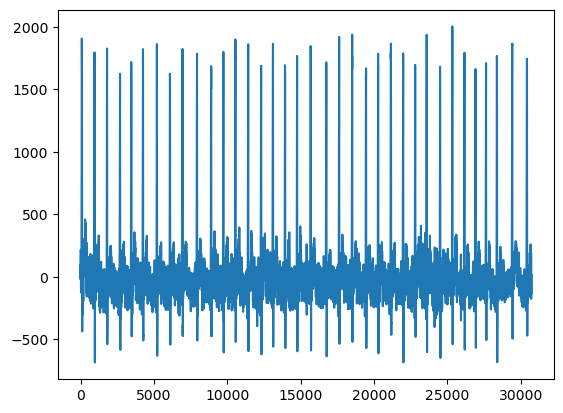

In [218]:
plt.plot(time_vector, ECG_filtered_reshape)

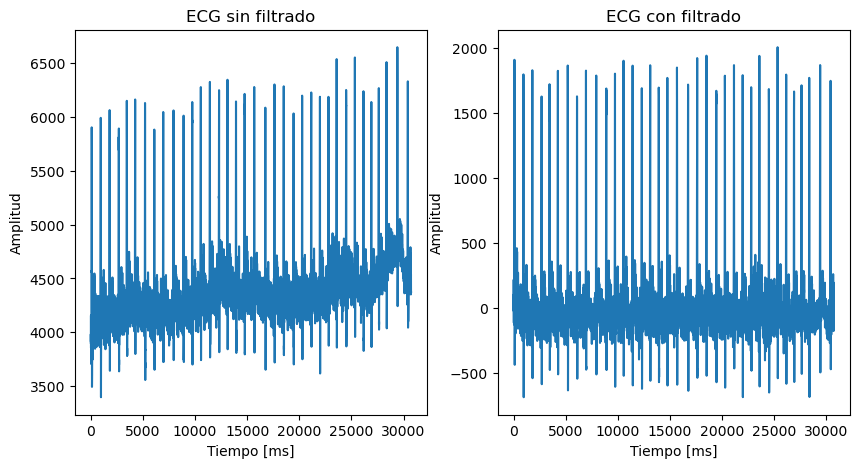

In [246]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('ECG sin filtrado')
plt.plot(time_vector, ECG_reshape)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')

plt.subplot(1,2,2)
plt.title('ECG con filtrado')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')

plt.plot(time_vector, ECG_filtered_reshape)


In [248]:
# Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. 
# Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados

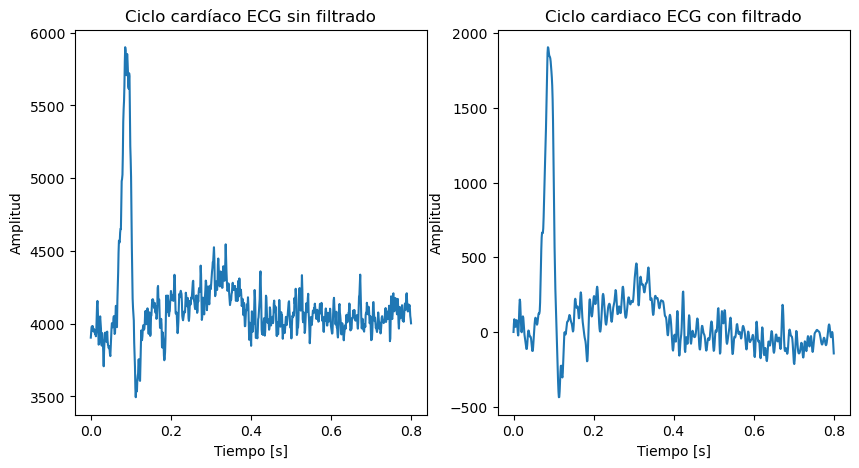

In [302]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Ciclo cardíaco ECG sin filtrado')
plt.plot(vector_time[0:820],ECG_reshape[0:820])
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(1,2,2)
plt.title('Ciclo cardiaco ECG con filtrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(vector_time[0:820],ECG_filtered_reshape[0:820])

plt.show()

In [280]:
ciclo_cardiaco_cruda = ECG_reshape[0:820]

In [294]:
promedio=ciclo_cardiaco_cruda.mean()
rms=valor_rms(ciclo_cardiaco_cruda)
ds=ciclo_cardiaco_cruda.std()

In [284]:
promedio

4118.878040741711

In [292]:
rms

4129.357203573384

In [296]:
ds

293.9976193766254

In [304]:
ciclo_cardiaco_filtrado= ECG_filtered_reshape[0:820]

In [310]:
promedio_filtrado = ciclo_cardiaco_filtrado.mean()

In [312]:
promedio_filtrado

92.32608916147845

In [314]:
rms_filtrado=valor_rms(ciclo_cardiaco_filtrado)
ds_filtrado=ciclo_cardiaco_filtrado.std()

In [316]:
rms_filtrado

324.92824339492785

In [318]:
ds_filtrado

311.53532161836836